


# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [31]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

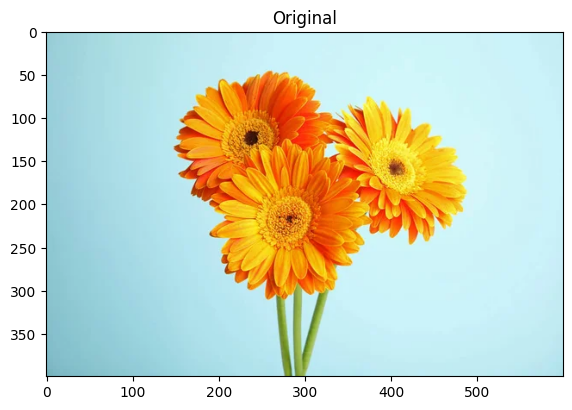

In [32]:
image="/kaggle/input/custom-image-dataset/flower.jpg"
# Load our image
image = cv2.imread(image)
imshow("Original", image)


# Store height and width of the image

In [33]:
height, width = image.shape[:2]

In [34]:

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4
# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

In [35]:

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

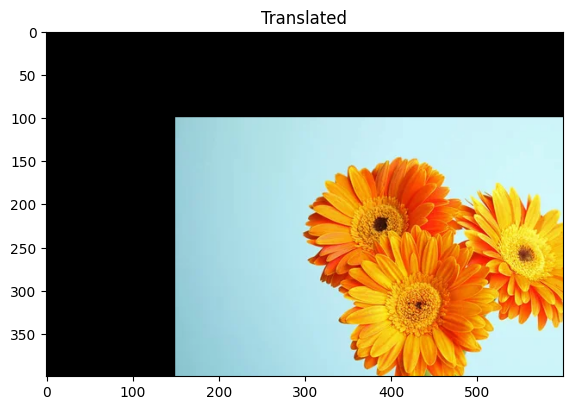

In [36]:
# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [37]:
# What does T look like
print(T)

print(height, width )

[[  1.   0. 150.]
 [  0.   1. 100.]]
400 600


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


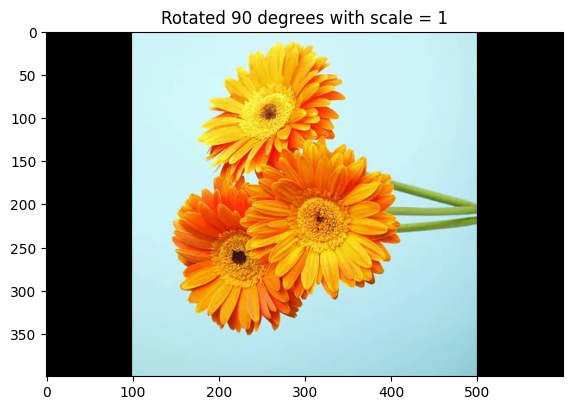

In [38]:

image = cv2.imread("/kaggle/input/custom-image-dataset/flower.jpg")
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

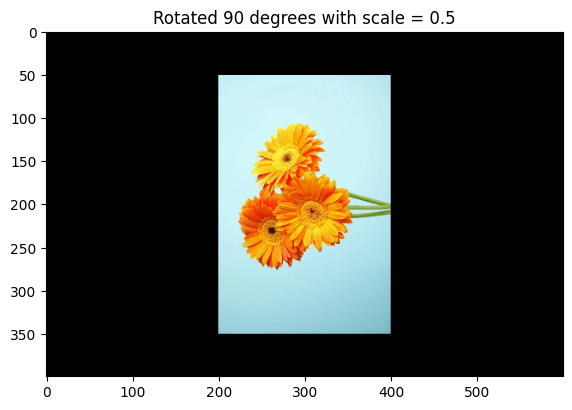

In [39]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

In [40]:
print(rotation_matrix)

[[ 3.061617e-17  5.000000e-01  2.000000e+02]
 [-5.000000e-01  3.061617e-17  3.500000e+02]]


* Notice all the black space surrounding the image.
* 
We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).
### **Rotations with cv2.transpose** (less flexible)




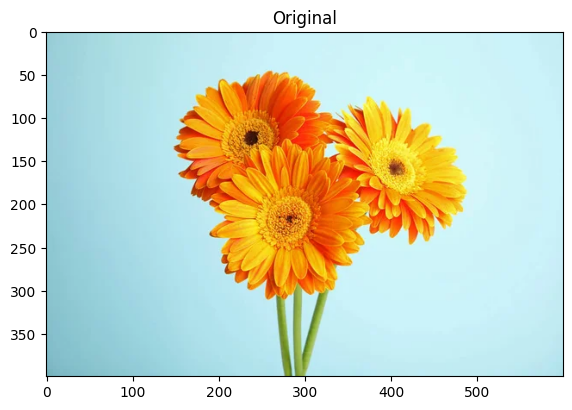

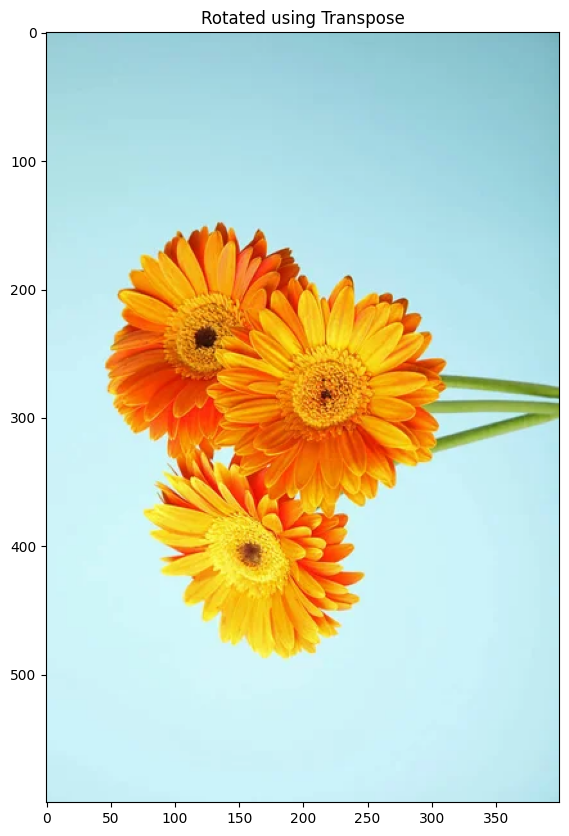

In [41]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
print("==================================================================================")
imshow("Rotated using Transpose", rotated_image)

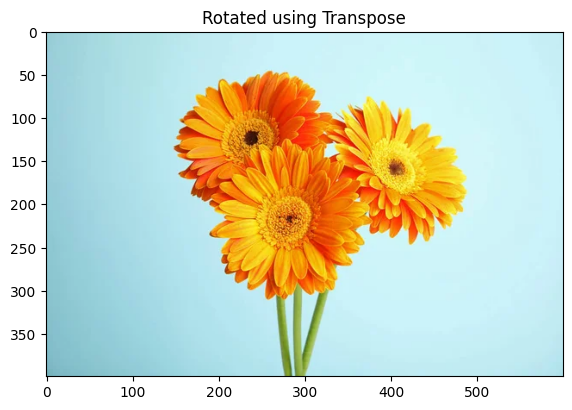

In [42]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

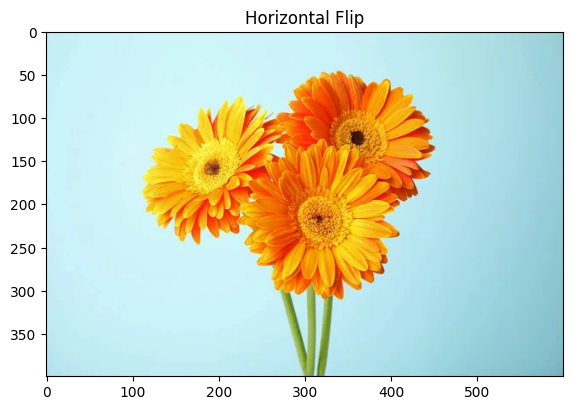

In [43]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)